In [1]:
# Import the packages and make sure they are actually loaded new
%reload_ext autoreload
%autoreload 2
from gunpowder_augmentor import prepare_gunpowder_pipeline
import matplotlib.pyplot as plt
import numpy as np
import gunpowder as gp

(1, 20, 128, 128)
(128, 128)
(128, 128)
(1, 20, 128, 128)
(128, 128)
(128, 128)
(1, 20, 128, 128)
(128, 128)
(128, 128)


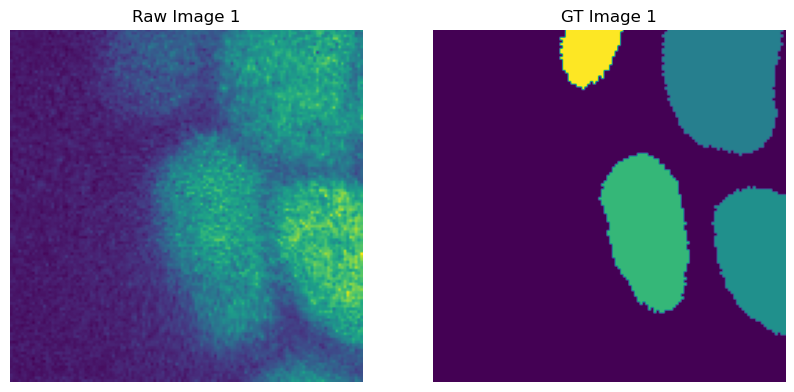

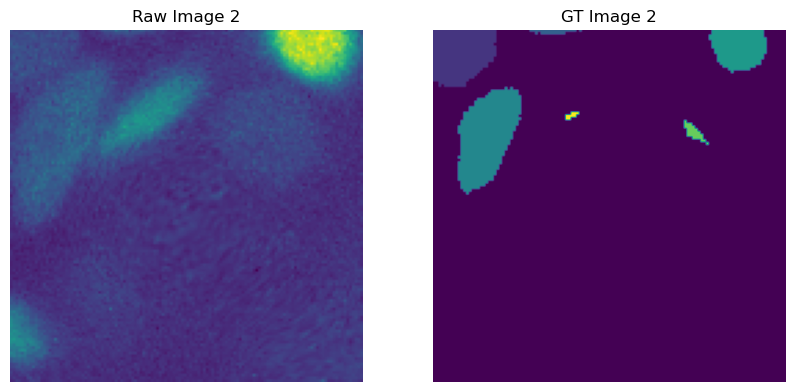

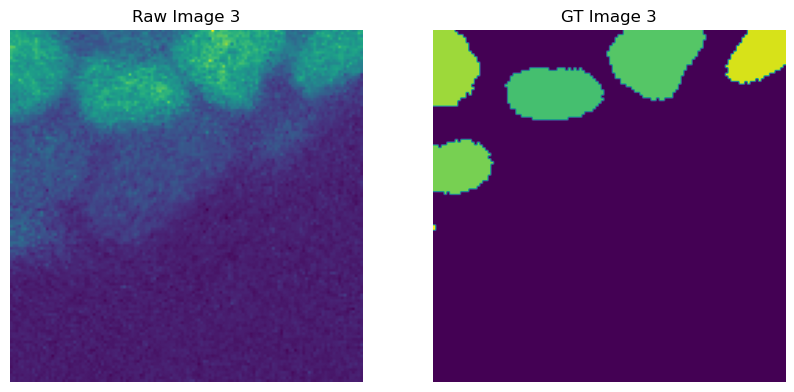

In [16]:
import os
import random
import zarr
import numpy as np
import matplotlib.pyplot as plt

# Specify the folder containing the Zarr files
load_path = '/mnt/efs/shared_data/hack/lsd/mjs_onlyaffs_norm3000_exp5/snapshot/'

# List all Zarr files in the folder
zarr_files = [file for file in os.listdir(load_path) if file.endswith('.zarr')]

# Create a dictionary to store 'raw' and 'gt' images
raw_gt_images = []

# Select the z-plane you want to view (replace with your desired z-plane)
z_plane_to_view = 0

# Loop through each Zarr file
for zarr_file in zarr_files:
    # Open the Zarr file
    zarr_path = os.path.join(load_path, zarr_file)
    zarr_group = zarr.open(zarr_path, mode='r')

    # Check if 'raw' and 'gt' datasets are available
    if 'raw' in zarr_group and 'gt' in zarr_group:
        # Load a random example image from the 'raw' dataset
        random_index = random.randint(0, len(zarr_group['raw']) - 1)
        raw_image = zarr_group['raw'][random_index]
        print(raw_image.shape)
        raw_image = zarr_group['raw'][random_index][0, z_plane_to_view, :, :]
        print(raw_image.shape)

        # Load the corresponding 'gt' image
        gt_image = zarr_group['gt'][random_index][z_plane_to_view, :, :]
        print(gt_image.shape)

        # Append the 'raw' and 'gt' images to the list
        raw_gt_images.append((raw_image, gt_image))

# Display the 'raw' and 'gt' images in the notebook
for i, (raw_image, gt_image) in enumerate(raw_gt_images):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(raw_image, cmap='viridis')
    plt.title(f'Raw Image {i+1}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gt_image, cmap='viridis')
    plt.title(f'GT Image {i+1}')
    plt.axis('off')

    plt.show()
